# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "VAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'VAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.124  1  0.187 0.666 0.001   
                             age        0.286  1  0.432 0.512 0.002   
                             Kiel       2.592  1  3.920 0.049 0.020   
                             Magdeburg  5.438  1  8.223 0.005 0.041   
                             Sweden     8.675  1 13.117 0.000 0.064   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.132  1  0.138 0.710 0.001   
                             age        0.850  1  0.889 0.347 0.005   
                             Kiel       0.174  1  0.182 0.670 0.001   
                             Magdeburg  2.239  1  2.342 0.128 0.012   
                             Sweden    16.395  1 17.143 0.000 0.082   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.177  0.780    False  
                             age               0.291  0.655    False  
                             Kiel              1.308  0.119    False  
                             Magdeburg         2.337  0.018     True  
                             Sweden            3.426  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.148  0.813    False  
                             age               0.460  0.508    False  
                             Kiel              0.174  0.784    False  
                             Magdeburg         0.894  0.251    False  
                             Sweden            4.284  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     VAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.979  1  7.143 0.008 0.036   
                             age        0.011  1  0.078 0.780 0.000   
                             Kiel       0.288  1  2.098 0.149 0.011   
                             Magdeburg  0.486  1  3.547 0.061 0.018   
                             Sweden     1.736  1 12.669 0.000 0.062   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.240  1  4.560 0.034 0.023   
                             age        0.776  1  1.581 0.210 0.008   
                             Kiel       2.431  1  4.950 0.027 0.025   
                             Magdeburg  1.871  1  3.810 0.052 0.020   
                             Sweden    18.433  1 37.533 0.000 0.164   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.087  0.023     True  
                             age               0.108  0.850    False  
                             Kiel              0.827  0.248    False  
                             Magdeburg         1.213  0.122    False  
                             Sweden            3.329  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.469  0.075    False  
                             age               0.677  0.327    False  
                             Kiel              1.564  0.062    False  
                             Magdeburg         1.281  0.107    False  
                             Sweden            8.299  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.666         0.177  0.780    False   
                             age       0.512         0.291  0.655    False   
                             Kiel      0.049         1.308  0.119    False   
                             Magdeburg 0.005         2.337  0.018     True   
                             Sweden    0.000         3.426  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.710         0.148  0.813    False   
                             age       0.347         0.460  0.508    False   
                             Kiel      0.670         0.174  0.784    False   
                             Magdeburg 0.128         0.894  0.251    False   
                             Sweden    0.000         4.284  0.000     True   

model                                    VAE                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.008         2.087  0.023     True  
                             age       0.780         0.108  0.850    False  
                             Kiel      0.149         0.827  0.248    False  
                             Magdeburg 0.061         1.213  0.122    False  
                             Sweden    0.000         3.329  0.002     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.034         1.469  0.075    False  
                             age       0.210         0.677  0.327    False  
                             Kiel      0.027         1.564  0.062    False  
                             Magdeburg 0.052         1.281  0.107    False  
                             Sweden    0.000         8.299  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'VAE': 'VAE'}

## Describe scores

In [10]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.257         2.488     0.332     0.224         3.305     0.277
std       0.300         5.329     0.327     0.293         6.178     0.320
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.340     0.015     0.000         0.408     0.002
50%       0.120         0.919     0.241     0.059         1.229     0.118
75%       0.457         2.420     0.609     0.391         3.338     0.522
max       1.000       146.739     1.000     0.999        83.348     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.666         0.177   
A0A024R0T9;K7ER74;P02655                           AD     0.068         1.169   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.049         1.314   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.486         0.313   
A0A075B6H7                                         AD     0.081         1.093   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.037         1.437   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.620         0.208   
S4R3U6                                             AD     0.710         0.148   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.780    False   
A0A024R0T9;K7ER74;P02655                           AD      0.154    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.118    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.634    False   
A0A075B6H7                                         AD      0.177    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.314    False   
Q9Y6X5                                             AD      0.094    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.744    False   
S4R3U6                                             AD      0.813    False   

model                                                       VAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.008         2.087   
A0A024R0T9;K7ER74;P02655                           AD     0.033         1.479   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.322         0.492   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.261         0.584   
A0A075B6H7                                         AD     0.007         2.144   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.235         0.629   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.520         0.284   
S4R3U6                                             AD     0.034         1.469   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.023     True  
A0A024R0T9;K7ER74;P02655                           AD      0.073    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.454    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.385    False  
A0A075B6H7                                         AD      0.020     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.250         1.414     0.331     0.233         1.595     0.293
std       0.290         1.675     0.313     0.288         1.817     0.311
min       0.000         0.002     0.000     0.000         0.001     0.000
25%       0.011         0.376     0.037     0.007         0.396     0.019
50%       0.126         0.900     0.248     0.086         1.063     0.161
75%       0.421         1.943     0.578     0.402         2.168     0.531
max       0.996        26.444     0.997     0.999        19.868     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,VAE
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1027,934


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.666         0.177  0.780   
A0A024R0T9;K7ER74;P02655                           0.068         1.169  0.154   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.049         1.314  0.118   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.486         0.313  0.634   
A0A075B6H7                                         0.081         1.093  0.177   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.314   
Q9Y6X5                                             0.037         1.437  0.094   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.620         0.208  0.744   
S4R3U6                                             0.710         0.148  0.813   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.008   
A0A024R0T9;K7ER74;P02655                              False 0.033   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.322   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.261   
A0A075B6H7                                            False 0.007   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.235   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.520   
S4R3U6                                                False 0.034   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.087  0.023   
A0A024R0T9;K7ER74;P02655                                   1.479  0.073   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.492  0.454   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.584  0.385   
A0A075B6H7                                                 2.144  0.020   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.283   
Q9Y6X5                                                     0.629  0.356   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.157   
Q9Y6Y9                                                     0.284  0.641   
S4R3U6                                                     1.469  0.075   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - VAE (no)    877
PI (yes) - VAE (yes)   337
PI (no)  - VAE (yes)   150
PI (yes) - VAE (no)     57
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                 VAE  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.666         0.177  0.780    False 0.008   
A0A075B6H7                   0.081         1.093  0.177    False 0.007   
A0A075B6H9                   0.477         0.322  0.625    False 0.019   
A0A075B6I0                   0.022         1.663  0.063    False 0.001   
A0A075B6J9                   0.080         1.098  0.175    False 0.013   
...                            ...           ...    ...      ...   ...   
Q9UKB5                       0.008         2.109  0.027     True 0.170   
Q9UNW1                       0.013         1.876  0.042     True 0.973   
Q9UP79                       0.227         0.643  0.378    False 0.000   
Q9UQ52                       0.057         1.245  0.134    False 0.001   
Q9Y6C2                       0.329         0.483  0.490    False 0.012   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.087  0.023     True       186  
A0A075B6H7                           2.144  0.020     True        91  
A0A075B6H9                           1.729  0.045     True       189  
A0A075B6I0                           3.175  0.003     True       194  
A0A075B6J9                           1.887  0.033     True       156  
...                                    ...    ...      ...       ...  
Q9UKB5                               0.771  0.275    False       148  
Q9UNW1                               0.012  0.983    False       171  
Q9UP79                               4.323  0.000     True       135  
Q9UQ52                               3.195  0.002     True       188  
Q9Y6C2                               1.920  0.031     True       119  

[207 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,VAE,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.780,0.023,186,PI (no) - VAE (yes)
A0A024R0T9;K7ER74;P02655,0.154,0.073,195,PI (no) - VAE (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.118,0.454,174,PI (no) - VAE (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.634,0.385,196,PI (no) - VAE (no)
A0A075B6H7,0.177,0.020,91,PI (no) - VAE (yes)
...,...,...,...,...
Q9Y6R7,0.314,0.283,197,PI (no) - VAE (no)
Q9Y6X5,0.094,0.356,173,PI (no) - VAE (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.157,197,PI (no) - VAE (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,VAE,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
D6RF35,0.994,0.021,57,PI (no) - VAE (yes),0.973
P51674;P51674-2;P51674-3,0.963,0.005,55,PI (no) - VAE (yes),0.958
O00187;O00187-2,0.979,0.031,119,PI (no) - VAE (yes),0.948
Q9UNW1,0.042,0.983,171,PI (yes) - VAE (no),0.941
A0A087X152;D6RE16;E0CX15;O95185;O95185-2,0.044,0.983,176,PI (yes) - VAE (no),0.939
...,...,...,...,...,...
Q14624,0.058,0.047,197,PI (no) - VAE (yes),0.011
F5GY80;F5H7G1;P07358,0.057,0.046,197,PI (no) - VAE (yes),0.011
Q9NX62,0.055,0.045,197,PI (no) - VAE (yes),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_1_VAE


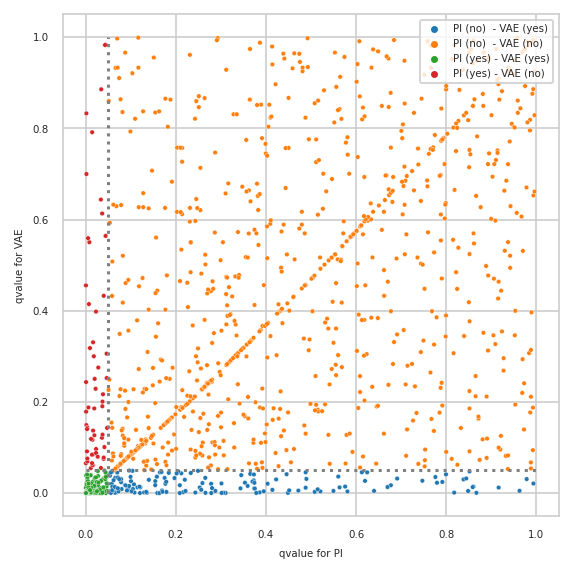

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_2_VAE


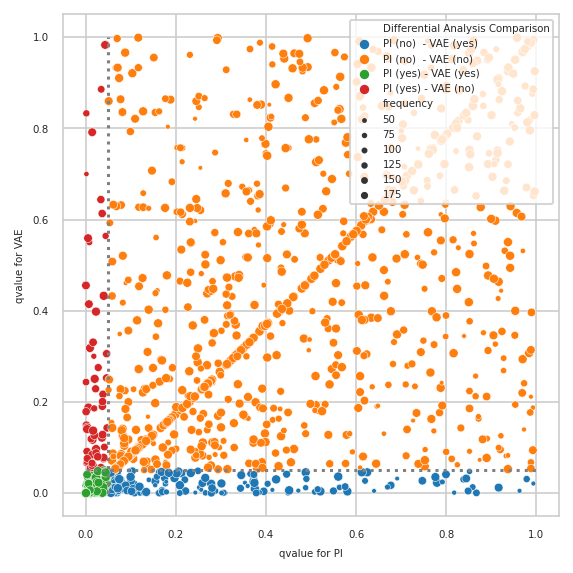

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/pimms/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out